   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

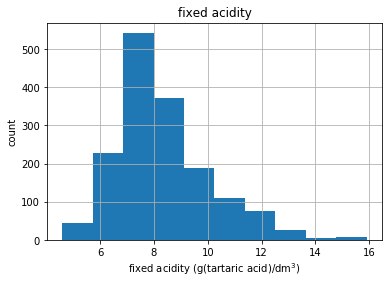

In [0]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep=";")

# Print the head of the DataFrame
print(df.head())

# Plot first column of df
pd.DataFrame.hist(df.iloc[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

In [0]:
# Finding the correlation of the dataset 

correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


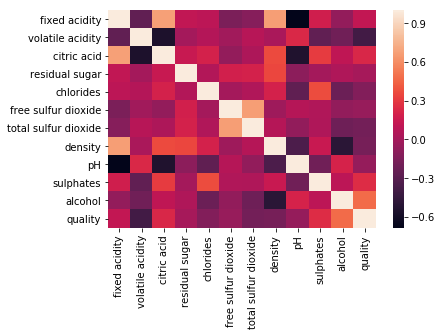

In [0]:
# Draw a heatmap and obtaining a detailed diagram of the correlation

import seaborn as sns
sns.heatmap(df.corr())
plt.show()

In [0]:
# Obtaining the features that have a correlation that is above the threshold value 

def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations


In [0]:
# taking features with correlation more than 0.05 as input x and quality as target variable y 
features = get_features(0.05) 
print(features) 
x = df[features] 
y = df['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [0]:
# Obtaining the new dataset after eliminating the 'residual sugar' feature column 
new_df= df.loc[:, ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
print(new_df)

      fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.4             0.700         0.00      0.076   
1               7.8             0.880         0.00      0.098   
2               7.8             0.760         0.04      0.092   
3              11.2             0.280         0.56      0.075   
4               7.4             0.700         0.00      0.076   
...             ...               ...          ...        ...   
1594            6.2             0.600         0.08      0.090   
1595            5.9             0.550         0.10      0.062   
1596            6.3             0.510         0.13      0.076   
1597            5.9             0.645         0.12      0.075   
1598            6.0             0.310         0.47      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20   

In [0]:
col_missing = new_df.isnull().sum()
print(col_missing)

fixed acidity           0
volatile acidity        0
citric acid             0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


In [0]:
# Since there is no missing data, we will deliberately add missing data into the dataset 

import random
new_df2 = new_df.to_csv(r'WineData.csv',index=False)
new_df3 = pd.read_csv(r'WineData.csv') 
nan_percent = {'fixed acidity':0.10, 'volatile acidity':0.15, 'citric acid':0.10,'chlorides':0.12,'free sulfur dioxide':0.10,'total sulfur dioxide':0.13,'density':0.11,'pH':0.11,'sulphates':0.12,'alcohol':0.14}  
for col in new_df3:                         
    for i, row_value in new_df3[col].iteritems():
        if random.random() <= nan_percent[col]:              
            new_df3[col][i] = np.nan
new_df3.to_csv(r'WineDataMissing.csv',index=False)
new_df4 = pd.read_csv(r'WineDataMissing.csv')
print(new_df4)

      fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.4             0.700         0.00      0.076   
1               7.8             0.880         0.00      0.098   
2               7.8             0.760         0.04      0.092   
3              11.2               NaN         0.56      0.075   
4               7.4             0.700          NaN      0.076   
...             ...               ...          ...        ...   
1594            6.2             0.600         0.08      0.090   
1595            5.9             0.550         0.10      0.062   
1596            6.3             0.510         0.13      0.076   
1597            5.9             0.645         0.12        NaN   
1598            6.0             0.310          NaN      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                   NaN  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20   

In [0]:
# Determining the number of missing values in each column 

col_missing = new_df4.isnull().sum()
print(col_missing)

fixed acidity           158
volatile acidity        230
citric acid             168
chlorides               195
free sulfur dioxide     151
total sulfur dioxide    224
density                 180
pH                      187
sulphates               205
alcohol                 219
dtype: int64


In [0]:
# Imputing the missing values with the mean of each column 

new_df7 = new_df4.fillna(new_df4.mean())
print(new_df7)

      fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.4          0.700000       0.0000   0.076000   
1               7.8          0.880000       0.0000   0.098000   
2               7.8          0.760000       0.0400   0.092000   
3              11.2          0.526227       0.5600   0.075000   
4               7.4          0.700000       0.2703   0.076000   
...             ...               ...          ...        ...   
1594            6.2          0.600000       0.0800   0.090000   
1595            5.9          0.550000       0.1000   0.062000   
1596            6.3          0.510000       0.1300   0.076000   
1597            5.9          0.645000       0.1200   0.087751   
1598            6.0          0.310000       0.2703   0.067000   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                11.00000             46.478182  0.997800  3.510000   
1                25.00000             67.000000  0.996800  3.200000   
2     

In [0]:
# Before data integration
url_wine = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_df = pd.read_csv(url_wine, sep=";")
print(wine_df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [0]:
# Data Integration
import pandas as pd

wine_df = pd.read_csv(url_wine, sep=";")
new_df5 = pd.merge(df, wine_df, on = ('fixed acidity','volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'))
new_df6 = new_df5.loc[:, ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','quality_y']]
print(new_df6)

      fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.4             0.700         0.00      0.076   
1               7.4             0.700         0.00      0.076   
2               7.4             0.700         0.00      0.076   
3               7.4             0.700         0.00      0.076   
4               7.8             0.880         0.00      0.098   
...             ...               ...          ...        ...   
2122            6.8             0.620         0.08      0.068   
2123            6.2             0.600         0.08      0.090   
2124            5.9             0.550         0.10      0.062   
2125            5.9             0.645         0.12      0.075   
2126            6.0             0.310         0.47      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    11.0                  34.0  0.99780  3.51   

In [0]:
# Before data transformation

print(new_df7)

      fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.4          0.700000       0.0000   0.076000   
1               7.8          0.880000       0.0000   0.098000   
2               7.8          0.760000       0.0400   0.092000   
3              11.2          0.526227       0.5600   0.075000   
4               7.4          0.700000       0.2703   0.076000   
...             ...               ...          ...        ...   
1594            6.2          0.600000       0.0800   0.090000   
1595            5.9          0.550000       0.1000   0.062000   
1596            6.3          0.510000       0.1300   0.076000   
1597            5.9          0.645000       0.1200   0.087751   
1598            6.0          0.310000       0.2703   0.067000   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                11.00000             46.478182  0.997800  3.510000   
1                25.00000             67.000000  0.996800  3.200000   
2     

In [0]:
# Normalize the dataset 
import pandas as pd
from sklearn import preprocessing

x = new_df7.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
new_df5 = pd.DataFrame(x_scaled)
new_df5.columns = ['fixed acidity', 'volatile acidity ', 'citric acid', 'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
print(new_df5)

      fixed acidity  volatile acidity   citric acid  chlorides  \
0          0.247788           0.397260       0.0000   0.107023   
1          0.283186           0.520548       0.0000   0.143813   
2          0.283186           0.438356       0.0400   0.133779   
3          0.584071           0.278238       0.5600   0.105351   
4          0.247788           0.397260       0.2703   0.107023   
...             ...                ...          ...        ...   
1594       0.141593           0.328767       0.0800   0.130435   
1595       0.115044           0.294521       0.1000   0.083612   
1596       0.150442           0.267123       0.1300   0.107023   
1597       0.115044           0.359589       0.1200   0.126675   
1598       0.123894           0.130137       0.2703   0.091973   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.140845              0.143032  0.567548  0.606299   
1                0.338028              0.215548  0.494126  0.3622

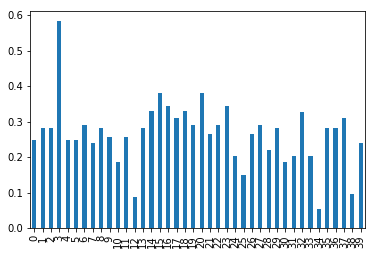

In [0]:
# Plotting the normalized dataframe

## Taking the first 40 in the 'fixed acidity' column 
new_df5['fixed acidity'].head(40).plot(kind='bar')

In [0]:
# Standardize the data
  
from sklearn.preprocessing import StandardScaler
features = ['fixed acidity', 'volatile acidity ', 'citric acid', 'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
new_df6[['fixed acidity', 'volatile acidity ', 'citric acid', 'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']] = new_df6[['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']].apply(pd.to_numeric)
new_df6 = new_df6.astype({"quality_y": str})
# Separating out the features
x = new_df6.loc[:, features].values
# Separating out the target
y = new_df6.loc[:,['quality_y']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [0]:
# Dimension reduction process using Principle Component Analysis (PCA)

## PCA Projection to 2D
### 9 columns (4D) into 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(principalDf)
finalDf = pd.concat([principalDf, new_df6[['quality_y']]], axis = 1)
print(finalDf)

      principal component 1  principal component 2
0                 -1.580071               0.564569
1                 -1.580071               0.564569
2                 -1.580071               0.564569
3                 -1.580071               0.564569
4                 -0.923345               1.983812
...                     ...                    ...
2122              -1.250477               1.015664
2123              -2.180277               0.726237
2124              -2.302028               0.630432
2125              -2.318388               0.880208
2126              -0.507159              -0.965419

[2127 rows x 2 columns]
      principal component 1  principal component 2 quality_y
0                 -1.580071               0.564569         5
1                 -1.580071               0.564569         5
2                 -1.580071               0.564569         5
3                 -1.580071               0.564569         5
4                 -0.923345               1.983812        

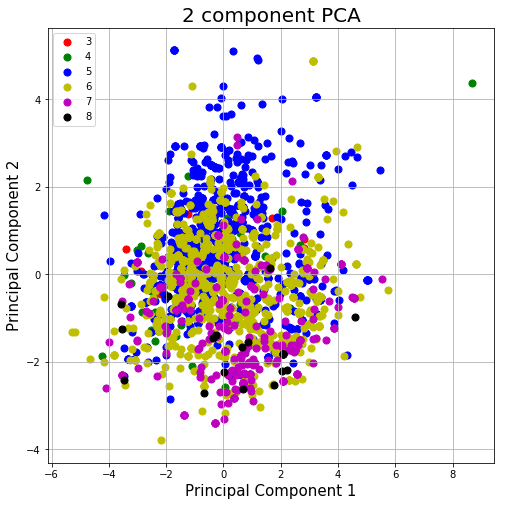

In [0]:
# Visualize 2D Projection
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
quality = ['3', '4', '5','6','7','8']
colors = ['r', 'g', 'b', 'y', 'm', 'k']
for quality1, color in zip(quality,colors):
    indicesToKeep = finalDf['quality_y'] == quality1 
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(quality)
ax.grid()